In [2]:
# from https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Blood%20Transfusion%20Service%20Center
import numpy as np
import pandas as pd

## Data

In [79]:
data_df = pd.read_csv('./transfusion.data.csv')
data_df.rename(columns={'Monetary (c.c. blood)': 'Volume (c.c. blood)'}, inplace=True)

In [73]:
short_df = data_df.copy()
for col in short_df.columns:
    shortname = col.split()[0]
    short_df.rename(columns={col:shortname}, inplace=True)
short_df = short_df.sort_index(axis=1)
short_df

,Frequency,Recency,Time,Volume,whether
0,50,2,98,12500,1
1,13,0,28,3250,1
2,16,1,35,4000,1
3,20,2,45,5000,1
4,24,1,77,6000,0
...,...,...,...,...,...
743,2,23,38,500,0
744,2,21,52,500,0
745,3,23,62,750,0
746,1,39,39,250,0


In [62]:
short_df.describe()

,Frequency,Recency,Time,Volume,whether
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,5.514706,9.506684,34.282086,1378.676471,0.237968
std,5.839307,8.095396,24.376714,1459.826781,0.426124
min,1.000000,0.000000,2.000000,250.000000,0.000000
25%,2.000000,2.750000,16.000000,500.000000,0.000000
50%,4.000000,7.000000,28.000000,1000.000000,0.000000
75%,7.000000,14.000000,50.000000,1750.000000,0.000000
max,50.000000,74.000000,98.000000,12500.000000,1.000000


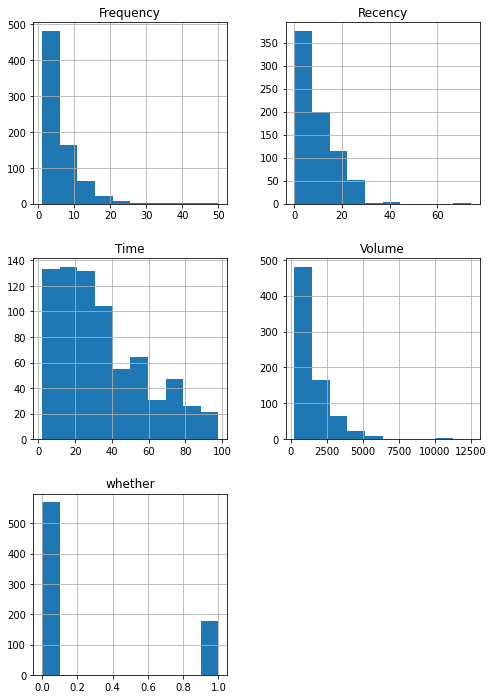

In [63]:
short_df.hist(figsize=(8,12));

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for col in short_df.columns[:-1]:
    scaledcol = scaler.fit_transform(np.array(short_df[col]).reshape(-1, 1))
    short_df[col] = scaledcol
short_df.describe()

,Frequency,Recency,Time,Volume,whether
count,7.480000e+02,7.480000e+02,7.480000e+02,7.480000e+02,748.000000
mean,-1.899847e-17,3.799694e-17,3.799694e-17,-5.699541e-17,0.237968
std,1.000669e+00,1.000669e+00,1.000669e+00,1.000669e+00,0.426124
min,-7.736751e-01,-1.175118e+00,-1.325186e+00,-7.736751e-01,0.000000
25%,-6.023074e-01,-8.351915e-01,-7.504834e-01,-6.023074e-01,0.000000
50%,-2.595718e-01,-3.098504e-01,-2.578809e-01,-2.595718e-01,0.000000
75%,2.545316e-01,5.554172e-01,6.452236e-01,2.545316e-01,0.000000
max,7.623346e+00,7.971997e+00,2.615633e+00,7.623346e+00,1.000000


In [84]:
from sklearn.model_selection import train_test_split

X = short_df[short_df.columns[:-1]]
y = short_df['whether']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((673, 4), (673,), (75, 4), (75,))

## Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(n_estimators=200, max_samples=.3)
RFclassifier.fit(X_train, y_train);
print("Train-set acc: " + str(RFclassifier.score(X_train, y_train)))
print("Test-set acc: " + str(RFclassifier.score(X_test, y_test)))

Train-set acc: 0.861812778603269
Test-set acc: 0.7733333333333333


## NN (TensorFlow)

In [197]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape = (X_train.shape[1],)),
    # tf.keras.layers.Dense(16, activation='tanh'),
    # tf.keras.layers.BatchNormalization(), tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 8)                 40        
                                                                 
 dense_50 (Dense)            (None, 8)                 72        
                                                                 
 dense_51 (Dense)            (None, 4)                 36        
                                                                 
 dense_52 (Dense)            (None, 1)                 5         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [199]:
model.fit(X_train, y_train, epochs=50, batch_size=128);

Epoch 1/50
6/6 [==============================] - 0s 2ms/step - loss: 0.4607 - accuracy: 0.8039
Epoch 2/50
6/6 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.8039
Epoch 3/50
6/6 [==============================] - 0s 1ms/step - loss: 0.4605 - accuracy: 0.8053
Epoch 4/50
6/6 [==============================] - 0s 1ms/step - loss: 0.4601 - accuracy: 0.8053
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.8053
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.8053
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.8068
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.4593 - accuracy: 0.8039
Epoch 9/50
6/6 [==============================] - 0s 2ms/step - loss: 0.4593 - accuracy: 0.8053
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 0.4592 - accuracy: 0.8053
Epoch 11/50
6/6 [======================

In [200]:
y_tr_pred = np.round(model.predict(X_train, verbose=0))
print("Train-set acc: " + str(1-np.linalg.norm(y_tr_pred.reshape(-1,) - y_train, ord=1)/len(y_train)))
y_pred = np.round(model.predict(X_test, verbose=0))
print("Test-set acc: " + str(1-np.linalg.norm(y_pred.reshape(-1,) - y_test, ord=1)/len(y_test)))

Train-set acc: 0.8038632986627043
Test-set acc: 0.84
